In [138]:
!pip install xlrd==1.2.0
!pip install openpyxl
#!pip install --upgrade tensorflow
#!pip install --upgrade tensorflow-gpu
!pip install xlrd==1.2.0
!pip install openpyxl
!pip install bltk
!pip install nltk
!pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer
!pip install bnlp_toolkit
import bltk
import numpy as np
import pandas as pd
import re
import _pickle as cPickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from nltk.corpus import stopwords
import nltk
from pandas import read_excel
from nltk.stem import WordNetLemmatizer
import string
from textblob import Word, TextBlob
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/banglakit/lemmatizer.git to /tmp/pip-install-nh6_oeqo/banglakit-lemmatizer_467510e1e1484541a14532e910e5d4f0
  Running command git clone -q https://github.com/banglakit/lemmatizer.git /tmp/pip-install-nh6_oeqo/banglakit-lemmatizer_467510e1e1484541a14532e910e5d4f0
Looking in inde

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
df_train= pd.read_csv('/content/drive/MyDrive/ start/OTT Content Reviews.xlsx - Sheet1 (3).csv', encoding='UTF-8' )
df_train

,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
6695,"অযথা সময় নষ্ট,এটা কোনো নাটক",2
6696,একটুকুও ভাল লাগেনাই,2
6697,এসব নষ্টা নাটক দেখে মানুষের চরিত্র খারাপ হয়,2
6698,টিপু ওয়ালা আপু মনোজ এর জন‍্য একটা সুন্দরী একটা...,2


In [141]:
print("Total Reviews:",len(df_train),
      "\nTotal Positive Reviews:",len(df_train[df_train.Label ==1]),
      "\nTotal Negative Reviews:",len(df_train[df_train.Label==2]),
      "\nTotal Neutral Reviews:",len(df_train[df_train.Label ==0]))


Total Reviews: 6700 
Total Positive Reviews: 3655 
Total Negative Reviews: 2166 
Total Neutral Reviews: 879


In [142]:
df_train.drop_duplicates(inplace=True)

In [143]:
df_train.shape

(6334, 2)

In [144]:
pcomment = df_train[df_train.Label == 1][:2100]
pcomment


,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
3474,দারুন একটা ওয়েব সিরিজ।,1
3475,ভালোই লেগেছে...... প্রত্যেক টা পার্ট।,1
3476,"মোক্তার সাহেবের শান্ত, স্থির চোখ আর শান্ত বাচ...",1
3477,দেখা শেষ।\nলাস্ট এর টুইস্ট টা ভালো ছিল,1


In [145]:
ncomment = df_train[df_train.Label == 2]
ncomment


,Text,Label
33,Mr. Robot series টাকে কপি-পেস্ট করে চালায় দিলে...,2
37,জাহান্নামী,2
41,খুব ধীরগতির web series. দেখে কোনো মজা পাইলাম ন...,2
50,বাংলা সিনেমার কথা বলে লাভ নেই,2
57,চাল নাই কিন্তু একুরিয়ামে মাছ আছে আপাতত মাছগুল...,2
...,...,...
6692,আচ্ছা এই নাটকের পরিচালক কে? রে? এইসব রাস্তার ট...,2
6693,টিপ পরে অভিনয় কর বেডা ।,2
6694,নপুংসক মনোজ তোর কপালে টিপ কই?,2
6695,"অযথা সময় নষ্ট,এটা কোনো নাটক",2


In [146]:
nuecomment = df_train[df_train.Label == 0]
nuecomment


,Text,Label
10,আগুন লাগিয়ে দিলো এক ঝলকেই,0
15,বাংলাদেশে নতুন কিছুর আশা,0
24,অতি শ্রীগ্রই শ্রীগ্রই নিশো ভাই কে সিনেমায় দেখবো,0
27,এটার জন্য আফরান নিশো বস শখের চুল কেটে ফেলেছিল ...,0
31,এটার কি season 2 আসবে!?,0
...,...,...
6616,এই মুভিটার ফুল মুভির লিংকটা কেউ দিন তো,0
6618,youtube ছাড়েন আপনাদের হইচই appe দেখতে পারছি না,0
6625,কোন সুন্দরী পরিচয় গোপন করে মজা করতে চাইলে ইনব...,0
6626,ছবির লিংকটা একটু দেওয়া যাবে,0


In [147]:
df_train = pd.concat([pcomment,ncomment,nuecomment], axis = 0)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



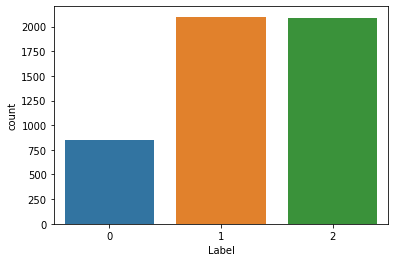

In [148]:
sns.countplot(df_train['Label']);

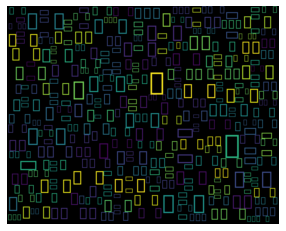

In [149]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in df_train['Text']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

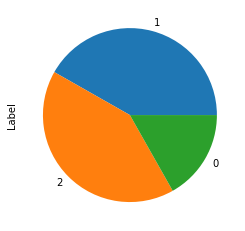

In [150]:

df_train['Label'].value_counts().plot(kind='pie')
plt.show()

Preprocessing/Cleaning

In [151]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [152]:
df_train['Text'] = df_train.Text.apply(lambda x: preprocessing(str(x)))

In [153]:
df_train

,Text,Label
0,পুরাই অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফিও জোস,1
4,এট লিস্ট অনন্ত জলীল এর কোটি টাকার মুভির ট্রেই...,1
...,...,...
6616,এই মুভিটার ফুল মুভির লিংকটা কেউ দিন তো,0
6618,ছাড়েন আপনাদের হইচই দেখতে পারছি না,0
6625,কোন সুন্দরী পরিচয় গোপন করে মজা করতে চাইলে ইনব...,0
6626,ছবির লিংকটা একটু দেওয়া যাবে,0


In [154]:
from bnlp import BasicTokenizer
btokenizer = BasicTokenizer()
def clean_text(Text):
    
    tokens = btokenizer.tokenize(Text)

Stopwords Removal

In [155]:
data1 =pd.read_excel('/content/drive/MyDrive/ start/stopwords_bangla.xlsx')
stop = data1['words'].tolist()

In [156]:
data1

,Unnamed: 0,words
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ
...,...,...
727,727,হয়েই
728,728,হয়েছিল
729,729,হয়েছে
730,730,হয়েছেন


In [157]:
def stopwordRemoval(text):    
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]
    
    out=' '.join(stm)
    
    return str(out)

In [158]:
df_train['Text'] = df_train.Text.apply(lambda x: stopwordRemoval(str(x)))

In [159]:
df_train

,Text,Label
0,পুরাই অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওনার কান্না আসছে,1
2,পুরাই আগুন দিনের অপেক্ষায় আছি দেখার,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফিও জোস,1
4,এট লিস্ট অনন্ত জলীল টাকার মুভির ট্রেইলার হাজার...,1
...,...,...
6616,মুভিটার ফুল মুভির লিংকটা,0
6618,ছাড়েন আপনাদের হইচই পারছি না,0
6625,সুন্দরী পরিচয় গোপন মজা চাইলে ইনবক্সে নক,0
6626,ছবির লিংকটা একটু,0


Stemming

In [160]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [161]:
df_train['Text']=df_train['Text'].apply(stem_text)

Streaming output truncated to the last 5000 lines.
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied third rules..
applied second rules..
applied first rules..


In [162]:
df_train

,Text,Label
0,পুরা অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওন কান্না আস,1
2,পুরা আগুন দিন অপেক্ষায় আছি দেখ,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফি জোস,1
4,এট লিস্ট অনন্ত জলীল টাকা মুভির ট্রেইল হাজারগুন...,1
...,...,...
6616,মুভি ফুল মুভির লিংকটা,0
6618,ছাড় আপনা হইচই পারছি না,0
6625,সুন্দরী পরিচয় গোপন মজা চাইলে ইনবক্সে নক,0
6626,ছবির লিংকটা একটু,0


In [163]:
#df_train["Text"].apply(lambda x: TextBlob(x).words).head()
#df_train['Text'] = df_train.Text.apply(lambda x: TextBlob(str(x)))

In [164]:
#df_train

lemmatizer

In [165]:
#importing lemmatizer
from banglakit import lemmatizer as lem
from banglakit.lemmatizer import BengaliLemmatizer

## lemmatizer function

def lemm_text (x):
  lemmatizer = BengaliLemmatizer()

  words=x.split(' ')
  lem = lemmatizer.lemm(words)
  words=(' ').join(lem)
  return words


In [166]:
df_train

,Text,Label
0,পুরা অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওন কান্না আস,1
2,পুরা আগুন দিন অপেক্ষায় আছি দেখ,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফি জোস,1
4,এট লিস্ট অনন্ত জলীল টাকা মুভির ট্রেইল হাজারগুন...,1
...,...,...
6616,মুভি ফুল মুভির লিংকটা,0
6618,ছাড় আপনা হইচই পারছি না,0
6625,সুন্দরী পরিচয় গোপন মজা চাইলে ইনবক্সে নক,0
6626,ছবির লিংকটা একটু,0


Category Wise Data Distribution

In [167]:
print("IN TRAIN SET...")
temp1 = df_train.groupby('Label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp1.style.background_gradient(cmap='Purples')

IN TRAIN SET...


,Label,Text
1,1,2100
2,2,2082
0,0,845


Count of Texts in Each Category

In [168]:
from plotly import graph_objs as go
print("On Train Set....")
fig = go.Figure(go.Funnelarea(
    text =temp1.Label,
    values = temp1.Text,
    title = {"position": "top center", "text": "Funnel-Chart of Category Distribution on Train Set"}
    ))
fig.show()

On Train Set....


In [169]:
## x= df.Customer_reviewText
# y= df.Class


In [170]:
#Dataset Summary

def data_summary(df_train):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip() for t in list(df_train.Text) for word in t.strip().split()]
    class_label= [k for k,v in df_train.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip() for t in list(df_train[df_train.Label==label].Text) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
                
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        
        # Documents per class
        documents.append(len(list(df_train[df_train.Label==label].Text)))
        
        # Total Word per class
        words.append(len(word_list))
        
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(df_train[df_train.Label==label].Text))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
                
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label


documents,words,u_words,class_names = data_summary(df_train)   


Class Name :  1
Number of Documents:2100
Number of Words:13317
Number of Unique Words:3765
Most Frequent Words:

ভালো	373
অসাধারণ	319
গান	318
সুন্দর	205
এক	202
অভিনয়	198
না	177
সিরিজ	161
দেখ	106
মুভি	104

Class Name :  2
Number of Documents:2082
Number of Words:15854
Number of Unique Words:5345
Most Frequent Words:

না	496
ভালো	237
এক	162
নাটক	151
সিরিজ	116
এসব	115
অভিনয়	106
সমাজ	99
সিনেমা	89
নষ্ট	84

Class Name :  0
Number of Documents:845
Number of Words:4518
Number of Unique Words:1946
Most Frequent Words:

না	122
মুভি	68
ভাই	62
নাটক	52
এপিসোড	44
চাই	42
ফুল	41
ভালো	40
পর্ব	39
সিরিজ	33
Total Number of Unique Words:8470


**Train-Test Spliting**

In [171]:
#x= df_train.Text.values[:4769]
#y= df_train.Label.values[:4769]
from sklearn.model_selection import train_test_split
X = df_train.Text
y = df_train.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [172]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer()
 
vectorizer.fit(X)
 
# Printing the identified Unique words along with their indices
# print("Vocabulary: ", vectorizer.vocabulary_)
 
# Encode the Document
vector = vectorizer.transform(X)
 
# Summarizing the Encoded Texts
# print("Encoded Document is:")
print(vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [173]:
from imblearn.over_sampling import SMOTE, ADASYN
import collections
x_resampled, y_resampled = SMOTE().fit_resample(vector,y)
print(sorted(collections.Counter(y_resampled).items()))


[(0, 2100), (1, 2100), (2, 2100)]


In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.2, shuffle=True, random_state=100)

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [176]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [177]:
model.score( X_test,y_test)

0.6262425447316103

In [178]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4021, 1645), (1006, 1645), (4021,), (1006,))

**Applying Logestic Regression**

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred1,y_test)))

AttributeError: ignored

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred1))

**Applying DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


decisiontreeclassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DecisionTreeClassifier()),
              ])
decisiontreeclassifier.fit(X_train, y_train)

y_pred = decisiontreeclassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforestclassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])
randomforestclassifier.fit(X_train, y_train)

y_pred = randomforestclassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying MultinomialNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB


naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naivebayes.fit(X_train, y_train)

y_pred = naivebayes.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', KNeighborsClassifier()),
              ])
KNeighborsClassifier.fit(X_train, y_train)

y_pred = KNeighborsClassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying SVC**

In [ ]:
from sklearn.svm import SVC

SVC = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SVC()),
              ])
SVC.fit(X_train, y_train)

y_pred = SVC.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying SGDClassifier**

In [ ]:
from sklearn.linear_model import SGDClassifier

SGDClassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier()),
              ])
SGDClassifier.fit(X_train, y_train)

y_pred = SGDClassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

xgboost = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', XGBClassifier()),
              ])
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**split and build model another way..**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer()
 
vectorizer.fit(x)
 
# Printing the identified Unique words along with their indices
# print("Vocabulary: ", vectorizer.vocabulary_)
 
# Encode the Document
vector = vectorizer.transform(x)
 
# Summarizing the Encoded Texts
# print("Encoded Document is:")
print(vector.toarray())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.2, shuffle=True, random_state=100)

In [ ]:
# X_train_counts.toarray()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model =SVC()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model =SGDClassifier()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)